# Q1. What is data encoding? How is it useful in data science?

Data encoding refers to the process of transforming data from one format to another for efficient storage, transmission, or processing. It involves converting data into a standardized representation that can be easily interpreted by computer systems.

In data science, data encoding plays a crucial role in several areas:

* Categorical Variable Encoding: Categorical variables, such as gender (e.g., "male" or "female") or product categories (e.g., "electronics," "clothing," or "food"), need to be encoded numerically for analysis and modeling. Different encoding techniques like one-hot encoding, label encoding, or ordinal encoding are used to convert categorical variables into numerical representations that machine learning algorithms can understand.

* Text Encoding: Textual data is encoded to transform unstructured text into numerical features. Techniques like bag-of-words, term frequency-inverse document frequency (TF-IDF), or word embeddings like Word2Vec or GloVe are used to represent text data numerically. This enables text-based analysis, sentiment analysis, text classification, or building natural language processing (NLP) models.

* Image Encoding: Images are encoded to transform pixel information into a numerical representation that can be processed by machine learning algorithms. Techniques such as pixel intensity values, color histograms, or more advanced methods like convolutional neural networks (CNNs) are used to encode image data. This enables tasks like image recognition, object detection, or image generation.

*  Compression: Data encoding is used in compression algorithms to reduce the size of data for efficient storage and transmission. Techniques like Huffman coding, run-length encoding, or Lempel-Ziv-Welch (LZW) compression are employed to encode data in a compact form without losing essential information. This is particularly useful when dealing with large datasets or when transmitting data over limited bandwidth networks.

*  Encryption: Encoding is an integral part of encryption techniques to protect sensitive data during storage or transmission. Encryption algorithms convert plaintext data into ciphertext using encoding mechanisms such as symmetric key encryption (e.g., Advanced Encryption Standard - AES) or asymmetric key encryption (e.g., RSA). This ensures data confidentiality and security.

In summary, data encoding is a fundamental process in data science that transforms data into a suitable format for analysis, modeling, storage, or secure transmission. It enables efficient data handling, feature extraction, and ensures compatibility between different systems and algorithms.






# Q2. What is nominal encoding? Provide an example of how you would use it in a real-world scenario.

Nominal encoding, also known as one-hot encoding or dummy encoding, is a technique used to represent categorical variables as binary vectors. Each category or label within a categorical variable is converted into a binary column, and for each observation, only one of these columns is marked as 1 (indicating the presence of that category) while others are marked as 0.

Here's an example to illustrate the use of nominal encoding:

Let's say you have a dataset of customer information for a marketing campaign, and one of the variables is "Preferred Color," which includes categories like "Red," "Blue," "Green," and "Yellow." To use this variable in a machine learning model, you need to encode it numerically.

Using nominal encoding, you would create separate binary columns for each category:

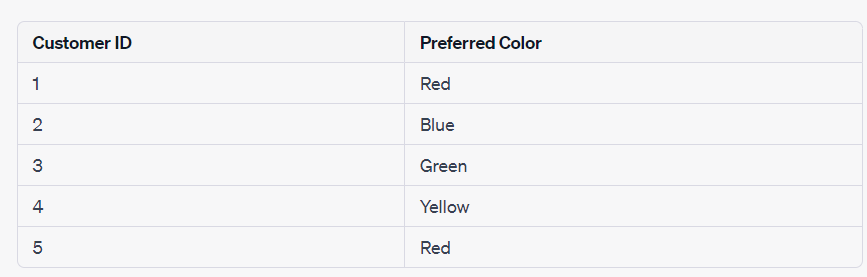

After nominal encoding, the dataset would look like this:
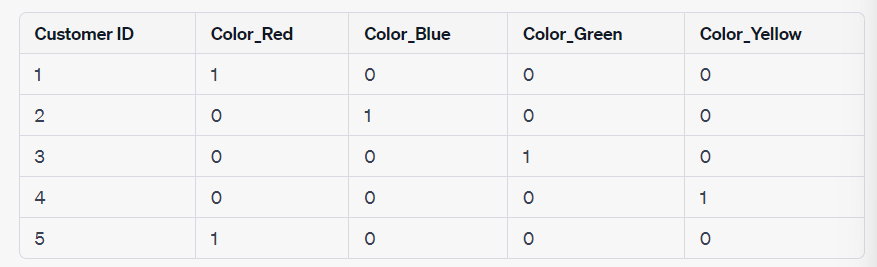

In this encoding scheme, each category of the "Preferred Color" variable is represented by a separate binary column. If a customer prefers a particular color, the corresponding column is marked as 1; otherwise, it is marked as 0.

This encoding allows machine learning algorithms to treat each category as a separate feature with a binary value. It prevents the algorithm from assuming any ordinal relationship or magnitude between the categories, which could lead to incorrect interpretations.

Nominal encoding is commonly used in various scenarios, such as:

* Sentiment analysis: Encoding sentiment labels (e.g., positive, negative, neutral) for text classification tasks.
* Market segmentation: Encoding customer attributes (e.g., age groups, income brackets, geographic regions) for clustering analysis.
* Customer preferences: Encoding product categories, brands, or features to analyze customer preferences and recommend personalized items.
* Fraud detection: Encoding transaction types, payment methods, or device types to identify patterns and anomalies in fraud detection systems.
By using nominal encoding, categorical variables can be transformed into a numerical format that can be easily processed by machine learning algorithms, enabling accurate and effective analysis of categorical data.

In [10]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Create a sample DataFrame
data = {
    'Customer ID': [1, 2, 3, 4, 5],
    'Preferred Color': ['Red', 'Blue', 'Green', 'Yellow', 'Red']
}
df = pd.DataFrame(data)

## create an instance of ohe
encoder=OneHotEncoder()
## fit the encoder to the dataframe and transform the categorical variable
encoded=encoder.fit_transform(df[["Preferred Color"]])
encoded_df=pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out())
final=pd.concat([df,encoded_df],axis=1)
print(final)

   Customer ID Preferred Color  Preferred Color_Blue  Preferred Color_Green  \
0            1             Red                   0.0                    0.0   
1            2            Blue                   1.0                    0.0   
2            3           Green                   0.0                    1.0   
3            4          Yellow                   0.0                    0.0   
4            5             Red                   0.0                    0.0   

   Preferred Color_Red  Preferred Color_Yellow  
0                  1.0                     0.0  
1                  0.0                     0.0  
2                  0.0                     0.0  
3                  0.0                     1.0  
4                  1.0                     0.0  


# Q3. In what situations is nominal encoding preferred over one-hot encoding? Provide a practical example.

Nominal encoding and one-hot encoding are essentially the same technique. They both convert categorical variables into binary columns. However, the term "nominal encoding" is often used when referring to the manual process of creating binary columns, while "one-hot encoding" typically refers to automated techniques or functions provided by libraries like pandas or scikit-learn.

In practice, nominal encoding (or one-hot encoding) is preferred over other encoding techniques in situations where:

* Categorical variables have a large number of unique categories: If a categorical variable has a high cardinality (a large number of unique categories), one-hot encoding can create a significant number of binary columns, resulting in a sparse and high-dimensional feature space. In such cases, other encoding techniques like target encoding or feature hashing may be preferred to reduce dimensionality.

* Categorical variables have ordinal information: Nominal encoding (one-hot encoding) treats all categories equally, without considering any order or hierarchy. If the categorical variable has ordinal information, such as ratings ("low," "medium," "high"), label encoding or ordinal encoding may be more appropriate as they preserve the ordinal relationship between categories.

* Interpretability and feature importance are important: One-hot encoding creates a binary column for each category, making it easy to interpret the presence or absence of a particular category. This can be useful for feature importance analysis or when human interpretability is desired.

* Dealing with missing values: One-hot encoding can handle missing values gracefully. If a categorical variable has missing values, one-hot encoding automatically creates a separate binary column to represent missing values, preserving that information during modeling.

Practical example:
Suppose you have a dataset of online product reviews with a categorical variable "Sentiment" that represents the sentiment of each review. The categories are "positive," "negative," and "neutral." You want to predict the sentiment of new reviews using a machine learning model. In this scenario, one-hot encoding (or nominal encoding) is preferred because:

* The categorical variable has a small number of unique categories ("positive," "negative," and "neutral").
* Each sentiment category is equally important, and there is no inherent order or hierarchy.
* One-hot encoding allows you to create three binary columns, where each column represents one sentiment category. This representation makes it easy to interpret the model's predictions and analyze the impact of each sentiment on the outcome.
By using one-hot encoding in this case, you transform the categorical variable into numerical features that can be readily used for sentiment analysis or training a machine learning model to predict sentiment based on other features in the dataset.






In [17]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Review': ['Great product!', 'Terrible experience.', 'Average quality.', 'Good service.'],
    'Sentiment': ['positive', 'negative', 'neutral', 'positive']
}
df = pd.DataFrame(data)

# Perform one-hot encoding using pandas get_dummies() function
encoded_df = pd.get_dummies(df, columns=['Sentiment'], prefix='Sentiment')
df1=pd.DataFrame(encoded_df)
# Print the encoded DataFrame
print(df1)


                 Review  Sentiment_negative  Sentiment_neutral  \
0        Great product!                   0                  0   
1  Terrible experience.                   1                  0   
2      Average quality.                   0                  1   
3         Good service.                   0                  0   

   Sentiment_positive  
0                   1  
1                   0  
2                   0  
3                   1  


# Q4. Suppose you have a dataset containing categorical data with 5 unique values. Which encoding technique would you use to transform this data into a format suitable for machine learning algorithms? Explain why you made this choice.

If you have a dataset with categorical data containing 5 unique values, one suitable encoding technique to transform the data for machine learning algorithms is one-hot encoding (also known as nominal encoding).

One-hot encoding would be the preferred choice for the following reasons:

* Representation of distinct categories: One-hot encoding represents each unique category as a separate binary column. This ensures that each category is treated distinctly and avoids introducing any ordinal relationship or magnitude between the categories. It accurately captures the categorical nature of the data.

* Preserves information and avoids false correlations: One-hot encoding creates binary columns, where only one category is marked as 1 and the others as 0 for each observation. This approach preserves the original information of the categorical variable without introducing any false correlations or assumptions about the relationships between the categories.

* Maintains interpretability and feature importance: One-hot encoding provides a clear and interpretable representation of the categorical data. Each binary column represents the presence or absence of a particular category, making it easy to understand the impact and importance of each category in the model's predictions. This is particularly useful when analyzing feature importance or when interpretability is important.

* Suitable for most machine learning algorithms: One-hot encoded features can be readily used with various machine learning algorithms. Many algorithms, such as linear models, decision trees, and neural networks, can handle this type of representation effectively. One-hot encoding ensures compatibility and allows algorithms to capture relationships between categories accurately.

However, it's worth noting that if the categorical variable has a large number of unique categories, one-hot encoding may result in a high-dimensional feature space, potentially causing computational challenges. In such cases, dimensionality reduction techniques like feature selection or feature extraction may be applied after encoding to mitigate this issue.

In summary, one-hot encoding is a suitable choice for transforming a categorical dataset with 5 unique values into a format suitable for machine learning algorithms. It accurately represents distinct categories, preserves information, maintains interpretability, and works well with most machine learning models.






# Q5. In a machine learning project, you have a dataset with 1000 rows and 5 columns. Two of the columns are categorical, and the remaining three columns are numerical. If you were to use nominal encoding to transform the categorical data, how many new columns would be created? Show your calculations.

If we have two categorical columns in a dataset with 1000 rows, and we decide to use nominal encoding (one-hot encoding) to transform the categorical data, the number of new columns created would depend on the number of unique categories within each categorical column.

Let's assume that the first categorical column has 4 unique categories and the second categorical column has 3 unique categories.

For the first categorical column with 4 unique categories, one-hot encoding would create 4 new binary columns. Each column represents one unique category, and for each row, only one column will have a value of 1, indicating the presence of that category. The other three columns will have a value of 0.

Similarly, for the second categorical column with 3 unique categories, one-hot encoding would create 3 new binary columns.

Therefore, the total number of new columns created would be the sum of the new columns from both categorical columns: 4 + 3 = 7 new columns.

So, when using nominal encoding (one-hot encoding) for the two categorical columns in the given dataset, a total of 7 new columns would be created.






In [19]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Categorical_1': ['A', 'B', 'C', 'A', 'B'],
    'Categorical_2': ['X', 'Y', 'X', 'Z', 'Z'],
    'Numerical_1': [10, 20, 30, 40, 50],
    'Numerical_2': [1.1, 2.2, 3.3, 4.4, 5.5],
    'Numerical_3': [100, 200, 300, 400, 500]
}
df = pd.DataFrame(data)

# Calculate the number of unique categories in each categorical column
unique_categories_1 = len(df['Categorical_1'].unique())
unique_categories_2 = len(df['Categorical_2'].unique())

# Calculate the total number of new columns created
total_new_columns = unique_categories_1 + unique_categories_2

# Print the results
print("Number of unique categories in Categorical_1:", unique_categories_1)
print("Number of unique categories in Categorical_2:", unique_categories_2)
print("Total new columns created:", total_new_columns)


Number of unique categories in Categorical_1: 3
Number of unique categories in Categorical_2: 3
Total new columns created: 6


# Q6. You are working with a dataset containing information about different types of animals, including their species, habitat, and diet. Which encoding technique would you use to transform the categorical data into a format suitable for machine learning algorithms? Justify your answer.

When working with a dataset containing information about different types of animals, including their species, habitat, and diet, the choice of encoding technique depends on the specific characteristics and requirements of the data and the machine learning task at hand. Generally, there are a few encoding techniques commonly used for transforming categorical data into a suitable format for machine learning algorithms, including one-hot encoding, label encoding, and target encoding.

* One-hot encoding: One-hot encoding is a common technique used to transform categorical variables into binary columns. Each unique category within a feature is represented by a separate binary column. One-hot encoding is useful when there is no inherent ordinal relationship between categories, and all categories are equally important. It allows machine learning algorithms to capture the presence or absence of a particular category, which can be helpful in modeling relationships between categories.

* Label encoding: Label encoding assigns a unique numerical label to each category within a feature. The assigned labels are typically integers. Label encoding is suitable when there is an ordinal relationship between categories, where the numerical value represents the order or hierarchy. However, it's important to note that label encoding may introduce unintended ordinal relationships between categories, which can impact the performance of some machine learning algorithms.

* Target encoding: Target encoding, also known as mean encoding, uses the target variable to encode categorical features. It replaces each category with the average value of the target variable for that category. Target encoding can be useful when there is a strong relationship between the categorical feature and the target variable. However, it is more susceptible to overfitting and can lead to data leakage if not properly implemented.

In the given scenario of working with animal data, the choice of encoding technique depends on the nature of the categorical variables and the objective of the machine learning task. Here are a couple of justifications for different encoding techniques:

a) One-hot encoding: If the species, habitat, and diet categories are independent and there is no inherent ordinal relationship between them, one-hot encoding would be a suitable choice. One-hot encoding would create binary columns for each category, allowing the machine learning algorithm to capture the presence or absence of a specific species, habitat, or diet in the animal data.

b) Label encoding: If there is an ordinal relationship between categories within a feature, such as a hierarchical habitat classification (e.g., "forest," "grassland," "aquatic"), label encoding can be considered. Label encoding would assign integer labels to the categories based on their order, preserving the ordinal information in the data.

It's important to carefully analyze the specific characteristics and requirements of the data and the machine learning task to determine the most appropriate encoding technique. Additionally, it may be necessary to preprocess the data, handle missing values, and consider the impact of encoding on the machine learning algorithm's performance before making a final choice.

# Q7.You are working on a project that involves predicting customer churn for a telecommunications company. You have a dataset with 5 features, including the customer's gender, age, contract type, monthly charges, and tenure. Which encoding technique(s) would you use to transform the categorical data into numerical data? Provide a step-by-step explanation of how you would implement the encoding.

To transform the categorical data into numerical data for predicting customer churn in the telecommunications company dataset, you can use a combination of one-hot encoding and label encoding, depending on the nature of the categorical features. Here's a step-by-step explanation of how you can implement the encoding:

* Identify the categorical features: In the dataset, identify the categorical features that need to be encoded. In this case, the categorical feature is likely to be the contract type, while gender may already be represented as binary values (e.g., 'Male' and 'Female').

* Apply label encoding: If there is an inherent ordinal relationship within a categorical feature, you can use label encoding. For example, if the contract type has categories like 'Month-to-month,' 'One year,' and 'Two year,' you can assign them numerical labels like 0, 1, and 2, respectively. Label encoding can be implemented using the LabelEncoder class from the scikit-learn library.

* Apply one-hot encoding: For categorical features without an ordinal relationship, such as gender, you can use one-hot encoding to create binary columns for each unique category. Each binary column represents the presence or absence of that category for a particular data point. One-hot encoding can be implemented using the get_dummies() function from the pandas library.

* Combine encoded features: After performing label encoding and one-hot encoding, you will have a mix of numerical features and binary columns representing the encoded categorical features. You can combine these features into a single dataset for further analysis and modeling.

Here's an example code snippet to illustrate the implementation of encoding techniques: